<a href="https://colab.research.google.com/github/imdebarun/tensorflow2/blob/main/Neural_Network_Regression_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Network in Tensorflow :
There are many definitions for a regression problem but in our case, we are going to simplify it: predicting a numerical variable based on some other comination of variables, even shorter...predicting a number.

### Hyperparameter & Typical value :
* Input layer shape - Same shape as number of input features
* Hidden layer(s) - Problem specific, minimum = 1, maximum = unlimited
* Neurons per hidden layer - Problem specific generally 10 to 100
* Output layer shape - Same shape as desired prediction shape
* Hidden Activation - Usually ReLU (rectified linear unit)
* Output Activation - None, ReLU, logistic/tanh
* Loss function - MSE (mean squared error) or MAE (mean absolute error) / Huber (combination of MAE/MSE) if outliers
* Optimizer - SGD (Stochastic gradient descent), ADAM

In [2]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


### Creating some data to view and fit -

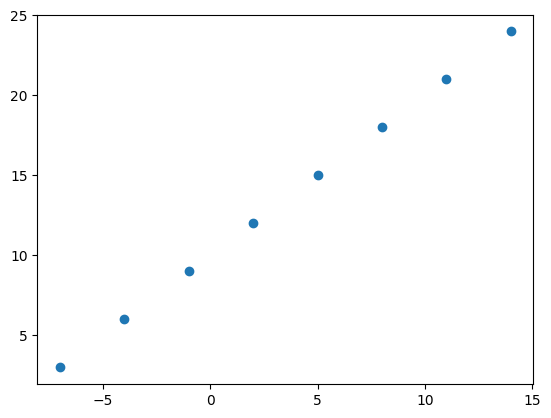

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features -
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels -
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it -
plt.scatter(X,y)

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output shapes -

In [5]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([937900])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([937900], dtype=int32)>)

In [6]:
# Turn our numpy arrays into tensors with dtype as float 32.
X = tf.cast(tf.constant(X), dtype= tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

### Steps in modelling with Tensorflow -
- **Creating a model** - define the input and output layers, as well as the layers of a deeplearning model.
- **Compililng a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model)
- **Fitting the model** - letting the model try to find patterns between X and y (features and labels)

In [8]:
# Add one extra dimension to the input value to become compataible with the model.
X = tf.reshape(X, (-1, 1))

In [9]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 3. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"]) # mae is short form of mean absolute error

# 4. Fit the model
model.fit(X, y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 853ms/step - loss: 10.8406 - mae: 10.8406
Epoch 2/5
1/1 [==============================] - 0s 21ms/step - loss: 10.7081 - mae: 10.7081
Epoch 3/5
1/1 [==============================] - 0s 22ms/step - loss: 10.5756 - mae: 10.5756
Epoch 4/5
1/1 [==============================] - 0s 14ms/step - loss: 10.4431 - mae: 10.4431
Epoch 5/5
1/1 [==============================] - 0s 18ms/step - loss: 10.3106 - mae: 10.3106


In [10]:
# # Optional methodology -
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

In [11]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
# Try to make a prediction using our model:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 177ms/step


array([[15.942187]], dtype=float32)

In [13]:
y_pred + 11

array([[26.942188]], dtype=float32)

### Steps in modelling with Tensorflow -
1. Construct or import a pretrained model relevant to your problem.
2. Compile the model (prepare it to be used with data)
  * **Loss** - how wrong your model's predictions are compared to the truth labels (we need to minimise this).
  * **Optimizer** - how your model should update its internal patterns to better its predictions.
  * **Metrics** - human interpretable values for how well your model is doing.
3. Fit the model to the training data so it can discover patterns
  * **Epochs** - how many times the model will go through all of the training examples.
4. Evaluate the model on the test data (how reliable are our model's predictions?)


## Improving our Model -
we can improve our model by altering our steps we took to create a model.
1. **Creating a Model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3.**Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer ) or on more data (give the model more examples to learn from).

In [14]:
# Let's rebuild our model

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 931ms/step - loss: 21.7279 - mae: 21.7279
Epoch 2/100
1/1 [==============================] - 0s 22ms/step - loss: 21.3348 - mae: 21.3348
Epoch 3/100
1/1 [==============================] - 0s 36ms/step - loss: 20.9417 - mae: 20.9417
Epoch 4/100
1/1 [==============================] - 0s 28ms/step - loss: 20.5558 - mae: 20.5558
Epoch 5/100
1/1 [==============================] - 0s 24ms/step - loss: 20.2746 - mae: 20.2746
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 19.9933 - mae: 19.9933
Epoch 7/100
1/1 [==============================] - 0s 26ms/step - loss: 19.7121 - mae: 19.7121
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 19.4308 - mae: 19.4308
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 19.1496 - mae: 19.1496
Epoch 10/100
1/1 [==============================] - 0s 25ms/step - loss: 18.8683 - mae: 18.8683
Epoch 11/100
1/1 [==============================

In [15]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Let's see if our model's prediction has improved ...
model.predict([17.0])

1/1 [==============================] - 0s 175ms/step


array([[29.425068]], dtype=float32)

In [17]:
# Let's see if we can make another change to improve our model -

#1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile( loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

#3. Fit the model
model.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 12.5815 - mae: 12.5815
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 12.1213 - mae: 12.1213
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 11.6758 - mae: 11.6758
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 11.2554 - mae: 11.2554
Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 10.8211 - mae: 10.8211
Epoch 6/100
1/1 [==============================] - 0s 24ms/step - loss: 10.3697 - mae: 10.3697
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 9.9059 - mae: 9.9059
Epoch 8/100
1/1 [==============================] - 0s 30ms/step - loss: 9.4103 - mae: 9.4103
Epoch 9/100
1/1 [==============================] - 0s 40ms/step - loss: 8.8827 - mae: 8.8827
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 8.3222 - mae: 8.3222
Epoch 11/100
1/1 [==============================] - 0s 27ms

In [18]:
# Let's remind ourselves of the data -
X,y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
# Let's try to predict the y value -
model.predict([17.0])

1/1 [==============================] - 0s 66ms/step


array([[32.029522]], dtype=float32)

In [20]:
# Let's see if we can make another change to improve our model - now No activation function and reduced hidden units.

#1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile( loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

#3. Fit the model
model.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 405ms/step - loss: 14.5050 - mae: 14.5050
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 13.9501 - mae: 13.9501
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 13.3991 - mae: 13.3991
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 12.8491 - mae: 12.8491
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 12.2972 - mae: 12.2972
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 11.7406 - mae: 11.7406
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 11.1764 - mae: 11.1764
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 10.6016 - mae: 10.6016
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 10.0134 - mae: 10.0134
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 9.4086 - mae: 9.4086
Epoch 11/100
1/1 [==============================] - 

In [21]:
# Let's try to predict the y value -
model.predict([17.0])

1/1 [==============================] - 0s 67ms/step


array([[29.236109]], dtype=float32)

In [22]:
# Let's see if we can make another change to improve our model - now we change the optimizer to ADAM optimizer

#1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile( loss="mae",
              optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae"])

#3. Fit the model
model.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 555ms/step - loss: 13.4462 - mae: 13.4462
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 13.3761 - mae: 13.3761
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 13.3060 - mae: 13.3060
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 13.2359 - mae: 13.2359
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 13.1658 - mae: 13.1658
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 13.0958 - mae: 13.0958
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 13.0257 - mae: 13.0257
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 12.9556 - mae: 12.9556
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 12.8855 - mae: 12.8855
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 12.8153 - mae: 12.8153
Epoch 11/100
1/1 [==============================] -

In [23]:
# Let's try to predict the y value -
model.predict([17.0])

1/1 [==============================] - 0s 72ms/step


array([[31.742954]], dtype=float32)

In [24]:
# Let's see if we can make another change to improve our model - now we change the optimizer to ADAM optimizer with learning rate

#1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile( loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
               metrics=["mae"])

#3. Fit the model
model.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 556ms/step - loss: 12.2501 - mae: 12.2501
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 12.1797 - mae: 12.1797
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 12.1093 - mae: 12.1093
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 12.0387 - mae: 12.0387
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 11.9679 - mae: 11.9679
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 11.8970 - mae: 11.8970
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 11.8259 - mae: 11.8259
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 11.7547 - mae: 11.7547
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 11.6833 - mae: 11.6833
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 11.6117 - mae: 11.6117
Epoch 11/100
1/1 [==============================

In [25]:
# Let's try to predict the y value -
model.predict([17.0])

1/1 [==============================] - 0s 199ms/step


array([[31.391407]], dtype=float32)

## Evaluating a model

In practice , typical workflow you'll go through when building neural network is:
```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...
```


#### When it comes to evaluation ... there are 3 words you should memorize:
> "visualize, Visualize, Visualize"

It is always a good idea to visualize -
* The data - what data are we working with? What does it look like?
* The model itself - What does our model look like?
* The traning of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original lables).

In [26]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [27]:
# Make labels for the dataset -
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

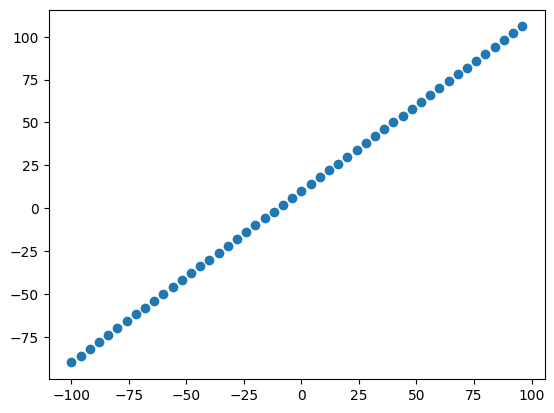

In [28]:
# Visualize the data:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [29]:
# Split the data into train and test sets -
X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data
Now we have got our data in training and test sets...let's visualize it again

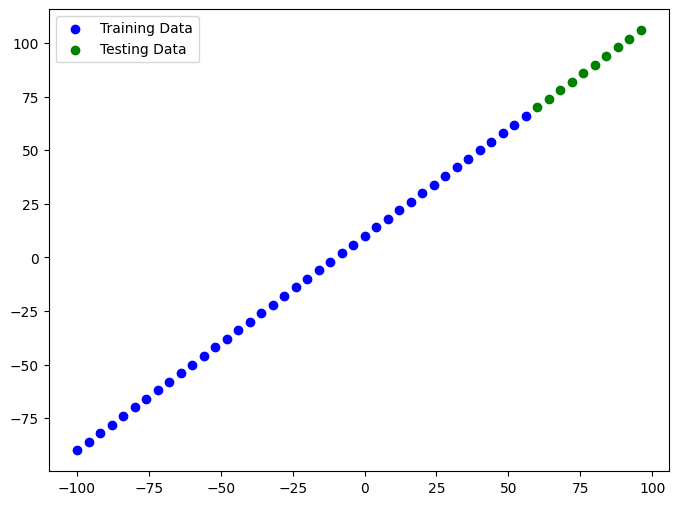

In [31]:
plt.figure(figsize =(8,6))
# Plot training data in blue-
plt.scatter(X_train, y_train, c='b', label = "Training Data") # Our model need to learn on this
# Plot testing data in green
plt.scatter(X_test, y_test, c='g', label = "Testing Data")
# Show a legend
plt.legend();

In [33]:
# Let's have a look at how to build a neural network for our data -

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# # 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

In [35]:
# model.summary()

In [36]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)
#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # Dense is a fully connected layer
])
# 2. Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])


In [37]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
# Let's fit our model with the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

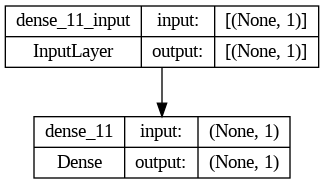

In [40]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes= True)